In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("3.01. Country clusters.csv")
data

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Australia,-25.45,133.11,English


In [3]:
### Google geographic center of the USA. Open wikipedia page and you will find latitudes and longitudes.

In [4]:
### Now convert the degrees into decimal degrees by some online converter

In [5]:
### Convention - North & East are positive, while West & South are positive

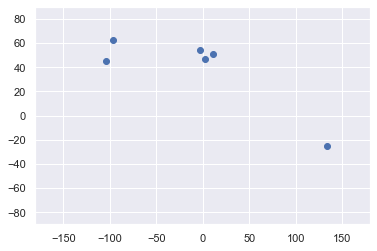

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [7]:
### The above clusters shows America, Europe, Australia

In [8]:
### DataFrame.iloc(row indices, column indices): slices the data frame, given rows & columns to be kept

In [9]:
x = data.iloc[:,1:3]

In [10]:
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


#### Clustering

In [11]:
kmeans = KMeans(2)

In [12]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Clustering Results

In [13]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [14]:
data_clusters = data.copy()
data_clusters['Clusters'] = identified_clusters
data_clusters

,Country,Latitude,Longitude,Language,Clusters
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


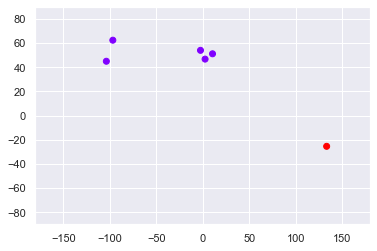

In [15]:
plt.scatter(data['Longitude'], data['Latitude'], c=data_clusters['Clusters'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()
#cmap: for color, as the default color for matplotlib is not so pretty

In [16]:
### There are 3 colors defining 3 different clusters.

### Selecting the number of clusters

#### WCSS (Within Clusters Sum of Squares

In [17]:
kmeans.inertia_

13205.758119999999

In [18]:
wcss=[]
for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [19]:
wcss

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

In [20]:
### As you can see the numbers are decreasing drastically in first two iterations

#### The elbow method

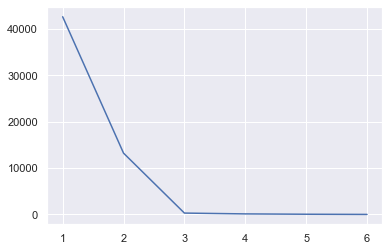

In [21]:
num_clusters = range(1,7)
plt.plot(num_clusters, wcss)

In [22]:
### A 3 cluster solution is best for our model.
### sklearn uses kmeans++ by default. If you use any other package keep an eye on it.